In [1]:
# Import relevant packages
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.colors as colors
from scipy.stats import norm
import json

In [2]:
plt.rcParams.update({'font.size': 20,
                    'xtick.labelsize' : 40,
                    'ytick.labelsize' : 40,
                    'xtick.major.size' : 10,
                    'ytick.major.size' : 10,
                    'xtick.minor.size' : 5,
                    'ytick.minor.size' : 5,
                    'axes.labelsize' : 50,
                    'axes.titlesize' : 50}) 

In [9]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label="", savefig=False, dpi=300):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    elif type(data[0])==np.float64 : data_flat=data
    else: data_flat = ak.flatten(data)
    
    fig = plt.figure(figsize=(30,20))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.yscale(scale)
    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [10]:
# a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label="", savefig=False, dpi=300):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(30,20))
    ax = fig.add_subplot(111)
    
    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

# Discovering how the files are organized

In [4]:
treeB=uproot.open("/Users/isaac/Desktop/10TeVMCDataAnalysis/muonGun_pT_1000_5000_reco_9100.edm4hep.root")["events"]

In [5]:
# Get the list of branches in the tree
for branch in treeB.keys():
    print(branch)

EcalBarrelRelationsSimRec
EcalBarrelRelationsSimRec/EcalBarrelRelationsSimRec.weight
EcalBarrelRelationsSimRec#0
EcalBarrelRelationsSimRec#0/EcalBarrelRelationsSimRec#0.index
EcalBarrelRelationsSimRec#0/EcalBarrelRelationsSimRec#0.collectionID
EcalBarrelRelationsSimRec#1
EcalBarrelRelationsSimRec#1/EcalBarrelRelationsSimRec#1.index
EcalBarrelRelationsSimRec#1/EcalBarrelRelationsSimRec#1.collectionID
HcalBarrelsRelationsSimRec
HcalBarrelsRelationsSimRec/HcalBarrelsRelationsSimRec.weight
HcalBarrelsRelationsSimRec#0
HcalBarrelsRelationsSimRec#0/HcalBarrelsRelationsSimRec#0.index
HcalBarrelsRelationsSimRec#0/HcalBarrelsRelationsSimRec#0.collectionID
HcalBarrelsRelationsSimRec#1
HcalBarrelsRelationsSimRec#1/HcalBarrelsRelationsSimRec#1.index
HcalBarrelsRelationsSimRec#1/HcalBarrelsRelationsSimRec#1.collectionID
OETrackerHitsRelations
OETrackerHitsRelations/OETrackerHitsRelations.weight
OETrackerHitsRelations#0
OETrackerHitsRelations#0/OETrackerHitsRelations#0.index
OETrackerHitsRelations#0

In [13]:
tree = uproot.concatenate("/Users/isaac/Desktop/10TeVMCDataAnalysis/muonGun_pT_1000_5000_reco_9*.edm4hep.root:events",filter_name=["MC*","MUON*","SiTracks*", "*TrackerHits*", "PARAMETERS*", "AllTracks*"])

In [14]:
#Zipping together the position data from each of the tracker layers
locHits=ak.zip({
    "IBX": tree["IBTrackerHits.position.x"],
    "IBY": tree["IBTrackerHits.position.y"],
    "IBZ": tree["IBTrackerHits.position.z"],
    
    "IEX": tree["IETrackerHits.position.x"],
    "IEY": tree["IETrackerHits.position.y"],
    "IEZ": tree["IETrackerHits.position.z"],
    
    
    "VBX": tree["VBTrackerHits.position.x"],
    "VBY": tree["VBTrackerHits.position.y"],
    "VBZ": tree["VBTrackerHits.position.z"],
    
    "VEX": tree["VETrackerHits.position.x"],
    "VEY": tree["VETrackerHits.position.y"],
    "VEZ": tree["VETrackerHits.position.z"],
    
    
    "OBX": tree["OBTrackerHits.position.x"],
    "OBY": tree["OBTrackerHits.position.y"],
    "OBZ": tree["OBTrackerHits.position.z"],
    
    "OEX": tree["OETrackerHits.position.x"],
    "OEY": tree["OETrackerHits.position.y"],
    "OEZ": tree["OETrackerHits.position.z"]
    }, depth_limit=1)

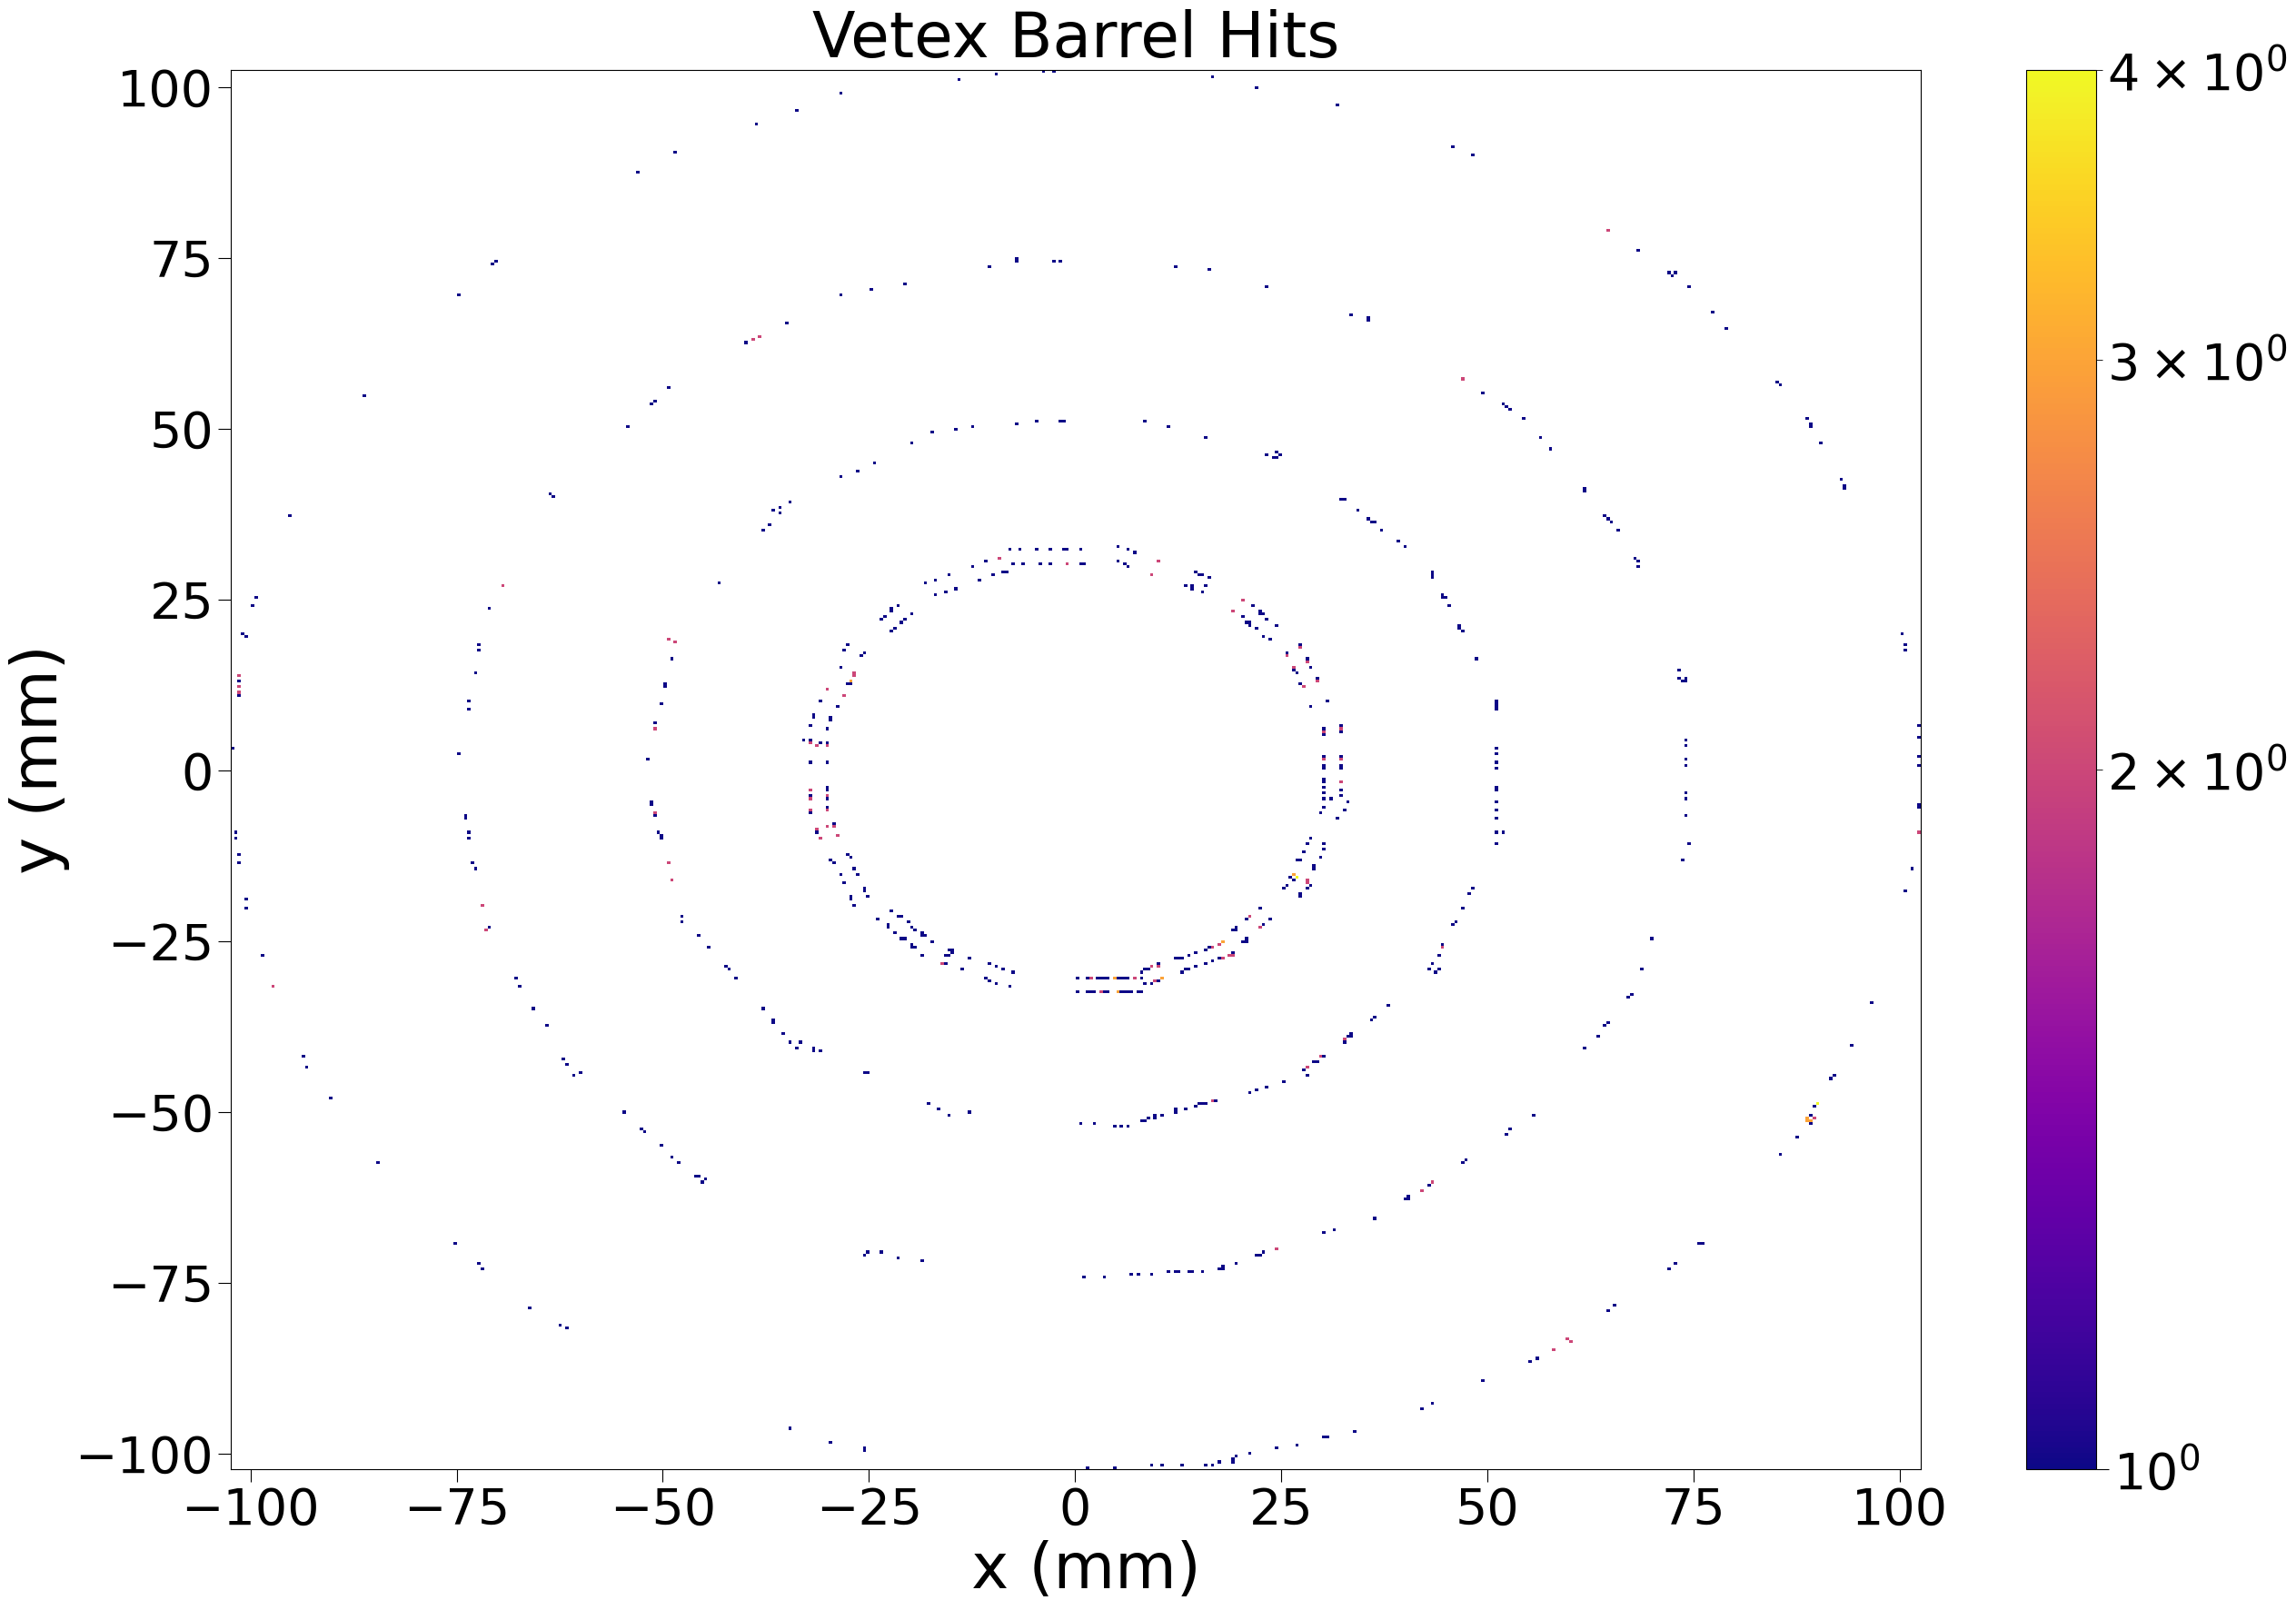

In [20]:
plot2DHistogram(locHits.VBX,locHits.VBY, bins=500, label="Vetex Barrel Hits; x (mm); y (mm)")

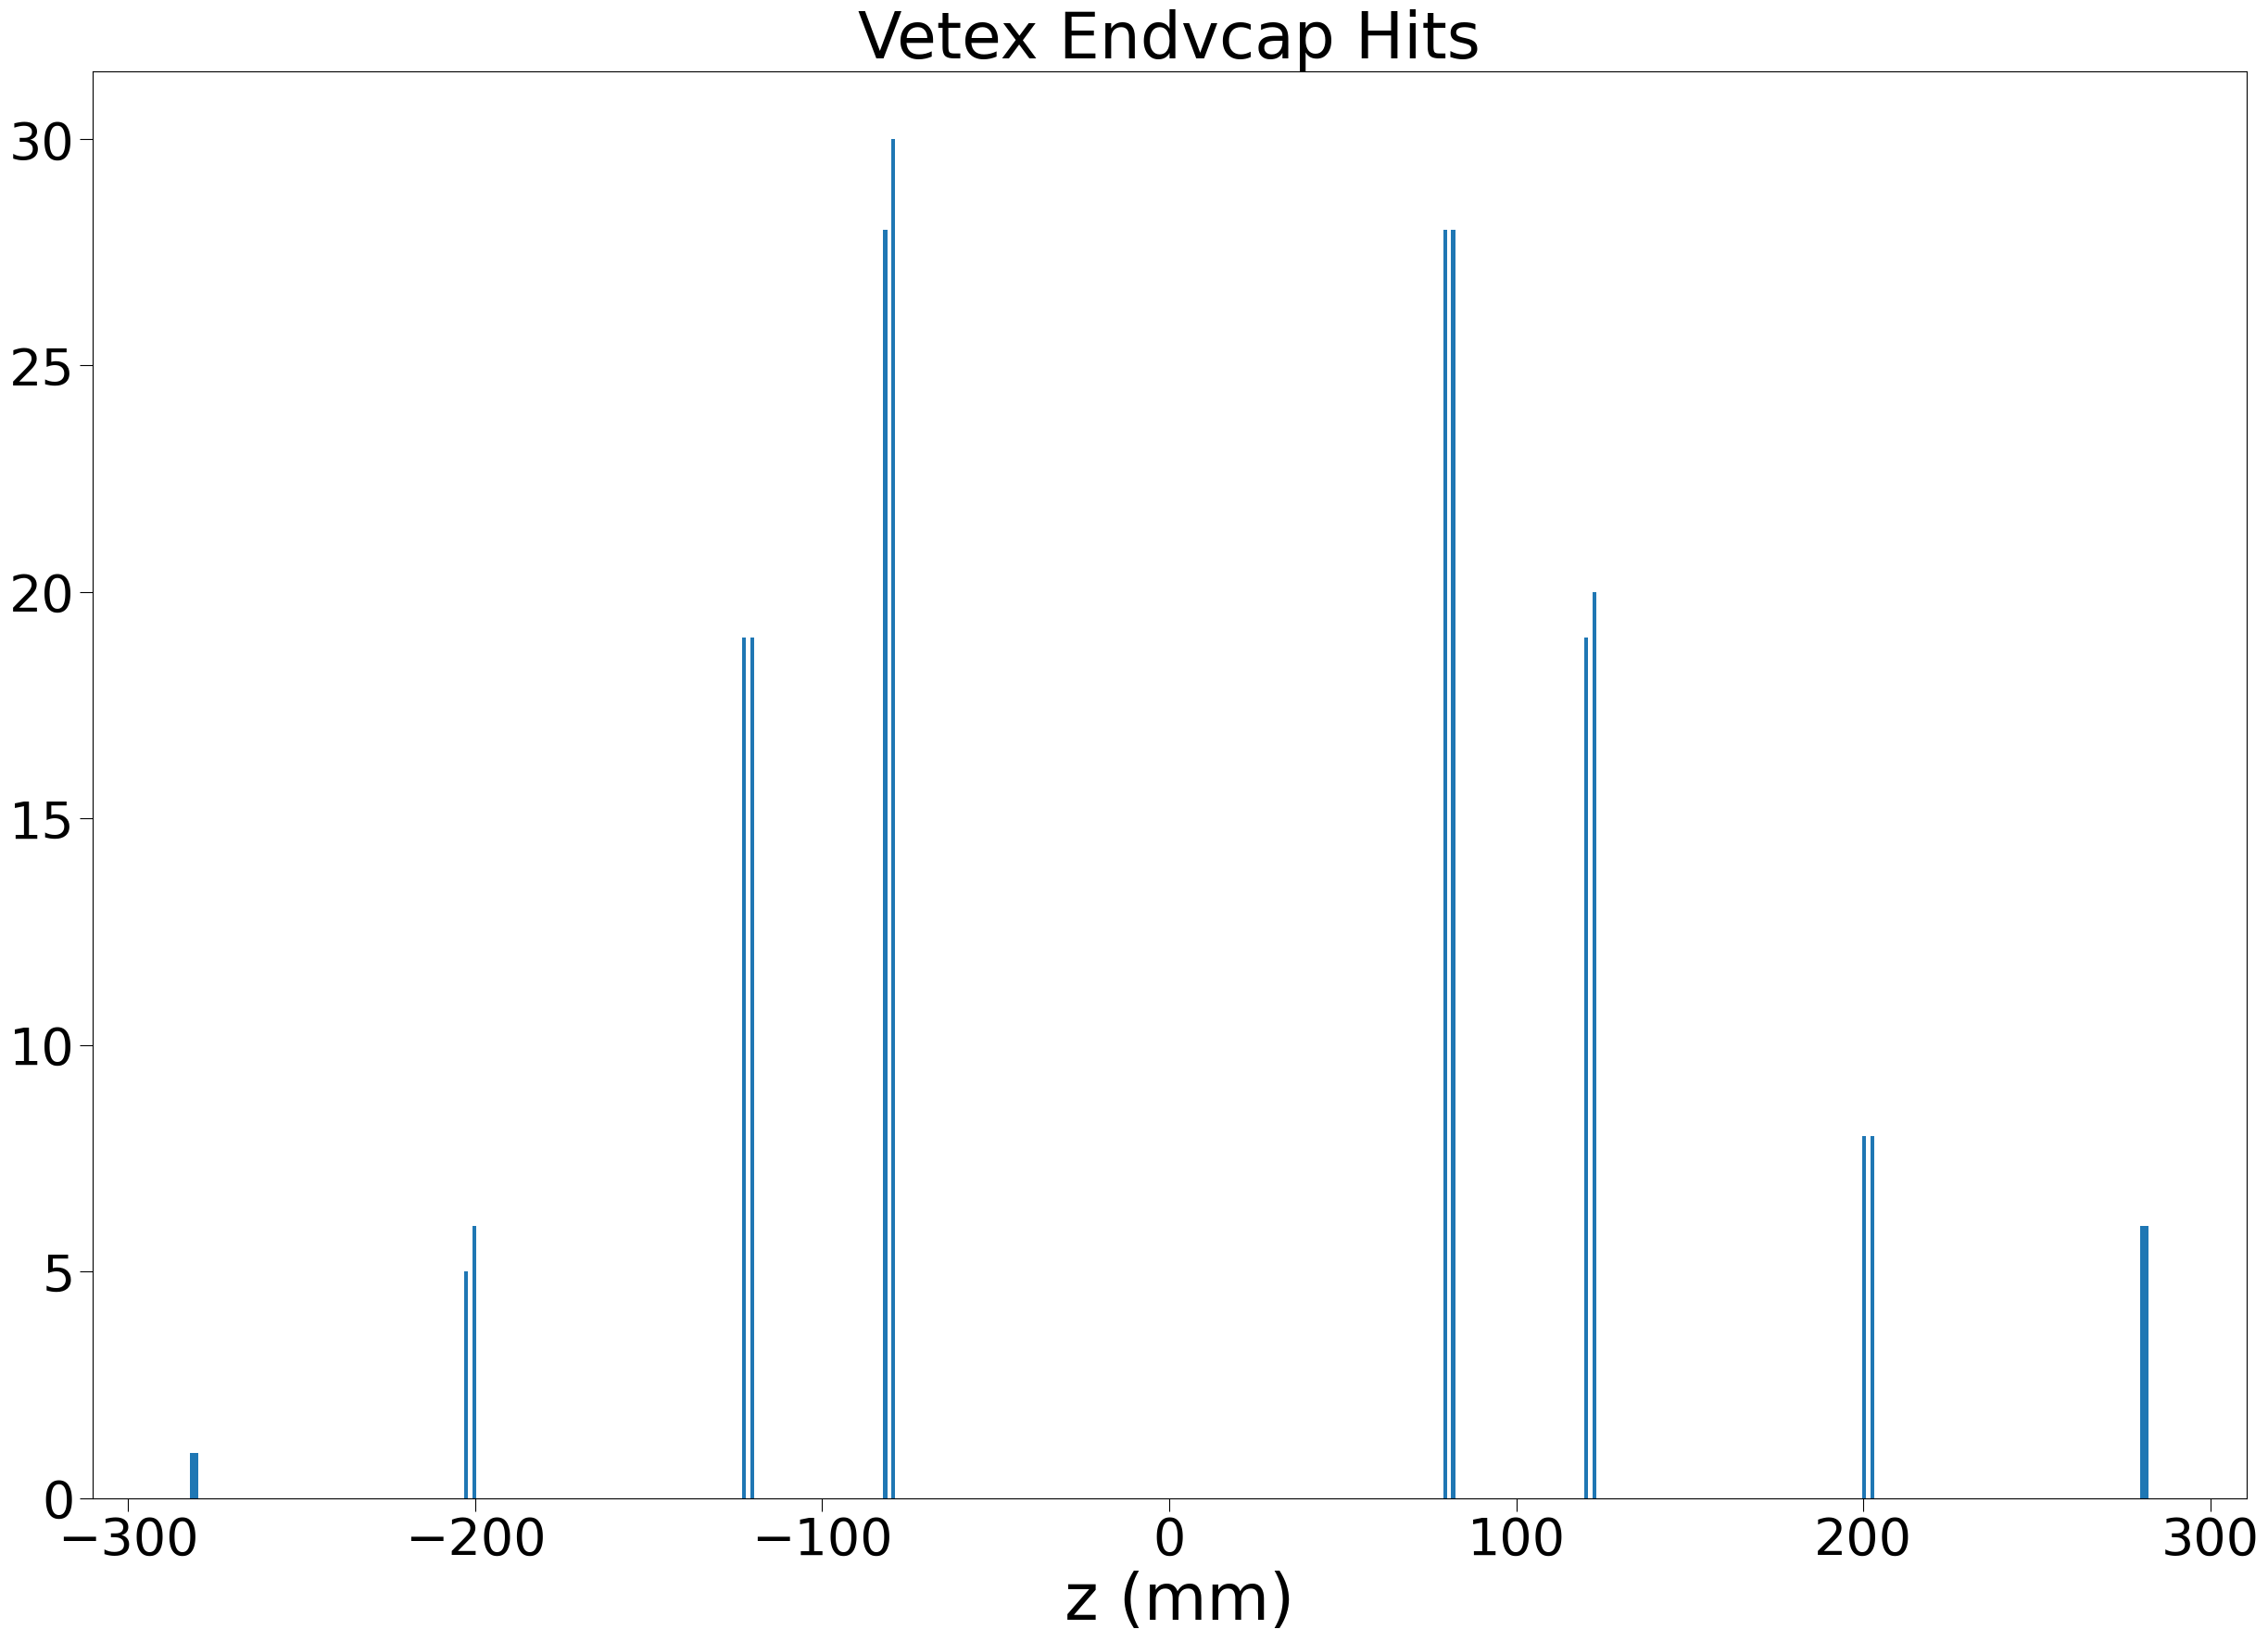

In [22]:
plot1DHistogram(locHits.VEZ, bins=500, label="Vetex Endvcap Hits; z (mm)")